The data consists of real historical data collected from 2010 & 2011.  Employees are manually allowed or denied access to resources over time. You must create an algorithm capable of learning from this historical data to predict approval/denial for an unseen set of employees. 

File Descriptions
train.csv - The training set. Each row has the ACTION (ground truth), RESOURCE, and information about the employee's role at the time of approval

test.csv - The test set for which predictions should be made.  Each row asks whether an employee having the listed characteristics should have access to the listed resource.

Column Descriptions
Column Name	Description
ACTION	ACTION is 1 if the resource was approved, 0 if the resource was not
RESOURCE	An ID for each resource
MGR_ID	The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time
ROLE_ROLLUP_1	Company role grouping category id 1 (e.g. US Engineering)
ROLE_ROLLUP_2	Company role grouping category id 2 (e.g. US Retail)
ROLE_DEPTNAME	Company role department description (e.g. Retail)
ROLE_TITLE	Company role business title description (e.g. Senior Engineering Retail Manager)
ROLE_FAMILY_DESC	Company role family extended description (e.g. Retail Manager, Software Engineering)
ROLE_FAMILY	Company role family description (e.g. Retail Manager)
ROLE_CODE	Company role code; this code is unique to each role (e.g. Manager)

# Library 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data 불러오기

In [2]:
train_df = pd.read_csv("AmazonAccess/data/train.csv")
test_df = pd.read_csv("AmazonAccess/data/test.csv")

In [3]:
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [4]:
test_df.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,32642,7792,118573,118574,117945,136261,128463,292795,119082
1,2,4696,14638,117961,118343,118514,118321,289122,255851,118322
2,3,22662,1760,118887,118888,120171,118396,255118,118398,118399
3,4,75078,7576,117961,118052,120671,118321,117906,257051,118322
4,5,39879,55668,117902,118041,117945,135951,134458,19776,119082


# Train, Test 결과값을 위한 변형
1. train_df에서 action컬럼을 y_train_df로 뽑기.
2. test_df에서 id컬럼을 결과값 만들때 쉽게하기 위해 y_id로 뽑기
3. 각각 두개를 떨군 train_feature_df, test_feature_df로 column을 동일하게 맞추고 all_df로 합치기.

In [5]:
y_train_df= train_df["ACTION"]

In [6]:
train_df["DATA"] = 0

In [7]:
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,DATA
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908,0
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539,0
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880,0
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322,0
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325,0


In [8]:
test_df.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,32642,7792,118573,118574,117945,136261,128463,292795,119082
1,2,4696,14638,117961,118343,118514,118321,289122,255851,118322
2,3,22662,1760,118887,118888,120171,118396,255118,118398,118399
3,4,75078,7576,117961,118052,120671,118321,117906,257051,118322
4,5,39879,55668,117902,118041,117945,135951,134458,19776,119082


In [9]:
y_id = test_df.id

In [10]:
test_df["DATA"] = 1

In [11]:
test_df.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,DATA
0,1,32642,7792,118573,118574,117945,136261,128463,292795,119082,1
1,2,4696,14638,117961,118343,118514,118321,289122,255851,118322,1
2,3,22662,1760,118887,118888,120171,118396,255118,118398,118399,1
3,4,75078,7576,117961,118052,120671,118321,117906,257051,118322,1
4,5,39879,55668,117902,118041,117945,135951,134458,19776,119082,1


In [12]:
train_feature_df = train_df.drop(["ACTION"],axis=1)
test_feature_df = test_df.drop(["id"],axis=1)

In [13]:
train_feature_df.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,DATA
0,39353,85475,117961,118300,123472,117905,117906,290919,117908,0
1,17183,1540,117961,118343,123125,118536,118536,308574,118539,0
2,36724,14457,118219,118220,117884,117879,267952,19721,117880,0
3,36135,5396,117961,118343,119993,118321,240983,290919,118322,0
4,42680,5905,117929,117930,119569,119323,123932,19793,119325,0


In [14]:
test_feature_df.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,DATA
0,32642,7792,118573,118574,117945,136261,128463,292795,119082,1
1,4696,14638,117961,118343,118514,118321,289122,255851,118322,1
2,22662,1760,118887,118888,120171,118396,255118,118398,118399,1
3,75078,7576,117961,118052,120671,118321,117906,257051,118322,1
4,39879,55668,117902,118041,117945,135951,134458,19776,119082,1


In [15]:
all_np = np.concatenate((train_feature_df, test_feature_df), axis=0)

In [16]:
# all_df = pd.DataFrame(np.concatenate((train_df.drop(["ACTION"],axis=1),(test_df.drop(["id"],axis=1)), axis=0),columns=test_df.columns)
all_df = pd.DataFrame(all_np, columns = train_feature_df.columns)

In [17]:
all_df.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,DATA
0,39353,85475,117961,118300,123472,117905,117906,290919,117908,0
1,17183,1540,117961,118343,123125,118536,118536,308574,118539,0
2,36724,14457,118219,118220,117884,117879,267952,19721,117880,0
3,36135,5396,117961,118343,119993,118321,240983,290919,118322,0
4,42680,5905,117929,117930,119569,119323,123932,19793,119325,0


In [18]:
all_df.tail()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,DATA
945127,32642,7792,118573,118574,117945,188271,139356,292795,119082,1
945128,41594,25262,126974,126975,118320,118685,120493,119970,118687,1
945129,45784,141,117961,118225,122273,118321,117906,238636,118322,1
945130,15716,2456,118752,118753,118754,119081,135951,292795,119082,1
945131,43443,7022,119062,119091,118535,118784,147114,290919,118786,1


# EDA

각각의 부서별로 action sum의 값을 확인해보자.

In [19]:
train_df.isnull().sum() # -> null 값은 없다.

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
DATA                0
dtype: int64

In [20]:
# 각 Column의 unique를 보자.
tc = train_df.columns

In [21]:
tc

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE', 'DATA'],
      dtype='object')

In [22]:
# for column in tc:
#     print(column, len(train_df[column].unique()))
#     x = train_df[column]
#     y = train_df["ACTION"]
#     plt.bar(x, y)
    

In [23]:
for column in tc:
    print(column, len(train_df[column].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343
DATA 1


<Figure size 432x288 with 0 Axes>

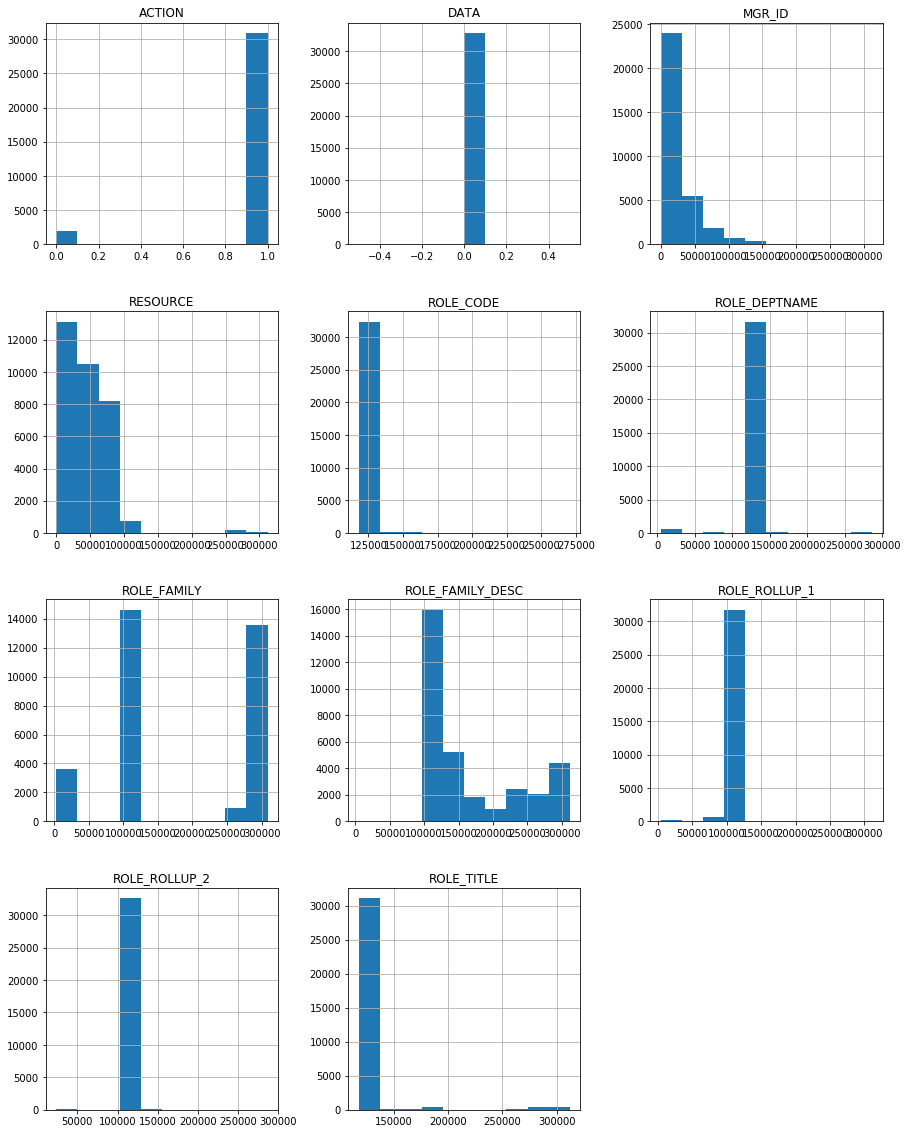

<Figure size 432x288 with 0 Axes>

In [24]:
# histograms
train_df.hist(figsize=(15,20))
plt.figure()

In [ ]:
# f,ax=plt.subplots(1,2,figsize=(18,8))
# df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
# ax[0].set_title('Survived vs Sex')
# sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
# ax[1].set_title('Sex:Survived vs Dead')
# plt.show()

In [45]:
train_accessed_df = train_df[train_df["ACTION"] == 1]
train_deny_df = train_df[train_df["ACTION"] == 0]

In [48]:
train_deny_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,DATA
5,0,45333,14561,117951,117952,118008,118568,118568,19721,118570,0
41,0,74310,49521,117961,118300,118301,119849,235245,118638,119851,0
55,0,78106,50613,117916,118150,118810,118568,159905,19721,118570,0
66,0,35043,14800,117961,117962,118352,118784,117906,290919,118786,0
68,0,15716,18073,118256,118257,118623,118995,286106,292795,118997,0


<Figure size 432x288 with 0 Axes>

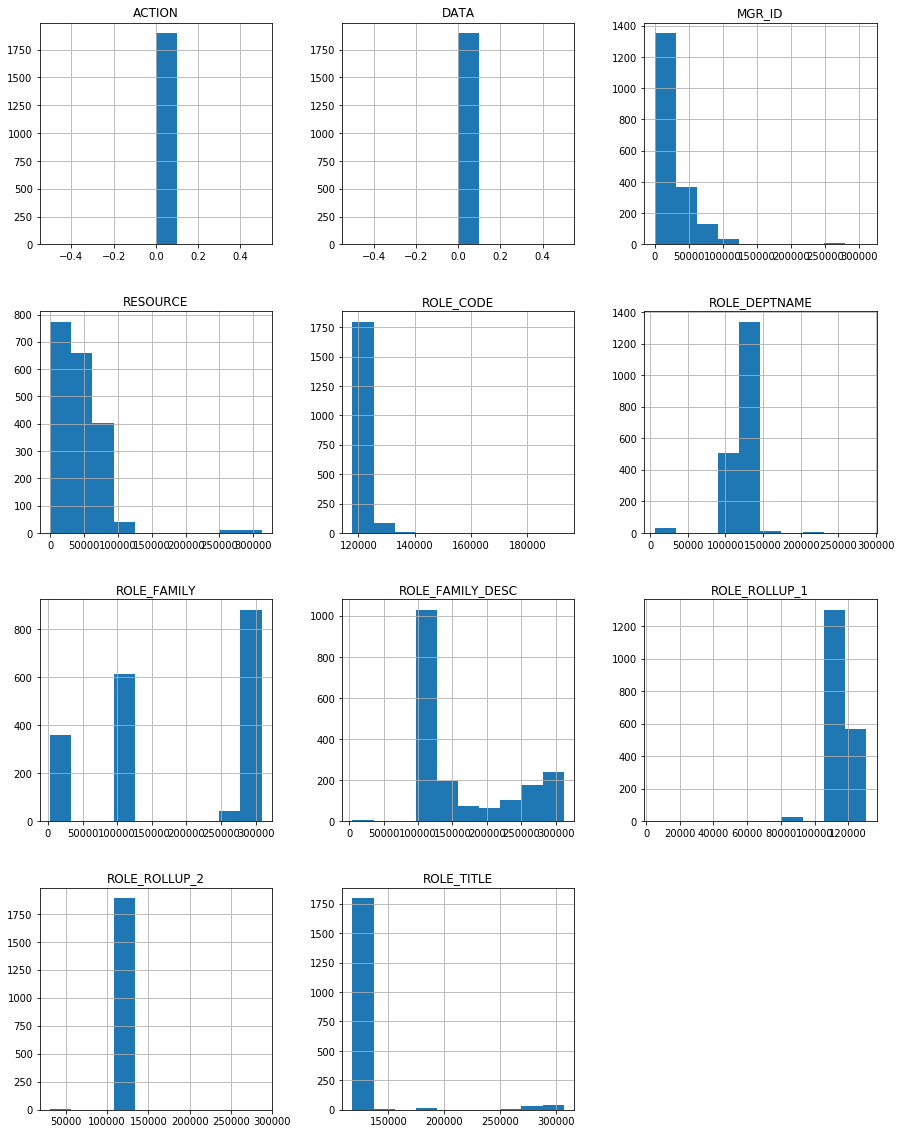

<Figure size 432x288 with 0 Axes>

In [49]:
train_deny_df.hist(figsize=(15,20))
plt.figure()

In [ ]:
train_df.groupby("RESOURCE")